In [1]:
from sklearn.tree import DecisionTreeRegressor

# Regression Tree
class regression_tree:
  # get data
  def __init__(self, x_train, y_train, x_test, y_test):
    # initialization for all attributes related to the house price prediction

    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test

    prediction = self.predict()
    self.plot(prediction)
#    print('Accuracy calculated in Normalized Root Mean Square Error = ',self.accuracy(prediction))
    self.accuracy(prediction)

  # data analysis and prediction
  def predict(self):
    # process data
    # training and prediction

    # fit model
    treemodel = DecisionTreeRegressor()
    treemodel.fit(self.x_train, self.y_train)
    
    # the output is the prediction result
    y_predict = treemodel.predict(self.x_test)

    return y_predict

  # demonstrate prediction result
  def plot(self,predict):
    # plot the prediction result

    # the input is the numerical result from the prediction method
    # the output is a plot shows the house price trend

    plt.figure()
    color1 = 'tab:blue'
    plt.plot(self.x_test.index, self.y_test, color=color1, label ='real')
    color2 = 'tab:red'
    plt.plot(self.x_test.index,predict, color=color2, label='prediction')
    plt.xlabel("ID")
    plt.ylabel("Sale Price")
    plt.title("Decision Tree Regression Prediction")
    plt.legend()
    plt.show()

  def accuracy(self,prediction):
      score = r2_score(prediction,self.y_test)
      self.score = score
      #return score
      #nrmse = np.sqrt(mean_squared_error(self.y_test, prediction)) / np.mean(self.y_test)
      #print('Accuracy calculated in Normalized Root Mean Square Error = ', nrmse)
      print('the r2 score is :',score)
      return score




In [2]:
from sklearn.linear_model import LinearRegression

# Linear Regression
class multivariate_linear_reg:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        
        y_test_predict = self.predict()
        
        # self.plot(y_test, y_test_predict)
        self.plot_(y_test, y_test_predict)
        
        self.test_MLRfunction(y_test_predict)
        print()
        
    def predict(self):
         # apply the model
        lr_method = LinearRegression()
        lr_method.fit(self.x_train, self.y_train)
        
         # get the predict result
        y_test_predict = lr_method.predict(self.x_test)

        
        return y_test_predict
    
    def plot_(self, y_test, y_test_predict):
        
        plt.scatter(self.x_test.index ,y_test, color='red')
        plt.plot(self.x_test.index, y_test_predict)
        plt.title("Linear Regression")
        plt.xlabel('predict data ID')
        plt.ylabel('Price')
        plt.show()
        
    def error(self,y_test_predict):
        # calculact the accuracy
        # the basic formula:  r2 = 1 – (SSres  /SSmean )
        score = r2_score(y_true =self.y_test, y_pred =y_test_predict)
        self.score = score
        print ('the r2 score is :', score)
        #print('mean_sqrd_error is:',mean_squared_error(self.y_test,y_test_predict))
        #print('root_mean_squared error of is:',np.sqrt(mean_squared_error(self.y_test,y_test_predict)))
        return score
   
    def test_MLRfunction(self,y_test_predict):
        assert 0 < self.error(y_test_predict)< 1,'R2 score have some problem'

In [3]:
# XGboost class
import xgboost as xgb

class XGboost:
  def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        
        
        self.x_test = x_test
        self.y_test = y_test
        
        y_test_predict = self.predict()
        
        self.plot(y_test, y_test_predict)
        self.error(y_test_predict)

  def predict(self):
        model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
        
        model_xgb.fit(self.x_train,self.y_train)
        xgb_train_pred = model_xgb.predict(self.x_test)
        xgb_pred = np.expm1(model_xgb.predict(self.x_test))
        return xgb_train_pred
  def plot(self,y_test, y_test_predict):
     
        test_dates = self.x_test.index     
        
        fig, ax = plt.subplots()
        ax.scatter(test_dates,y_test_predict, color='tab:red')
        #ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axi
        #ax2 = plt.twiny()  # instantiate a second axes that shares the same x-axi
        #ax2.set_ylabel('actual value', color=color)  # we already handled the x-label with ax1
        ax.scatter(test_dates,y_test, color='tab:blue')
        plt.title("XGboost Prediction")
        plt.show()

  def error(self,y_test_predict):
        # calculact the accuracy
        # the basic formula:  r2 = 1 – (SSres  /SSmean )
        score = r2_score(y_test_predict,self.y_test)
        self.score = score
        print ('the r2 score is :', score)
        #print('mean_sqrd_error is:',mean_squared_error(y_test_predict, self.y_test))
        #print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test_predict, self.y_test)))
        return score


In [4]:
# Neural Network

import tensorflow as tf 
from tensorflow import keras 

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

class neuralnetwork:
    def __init__(self, x_train, y_train, x_test, y_test):
        self.x_train = x_train
        self.y_train = y_train
        
        
        self.x_test = x_test
        self.y_test = y_test
        
        y_test_predict = self.predict()
        
        self.plot(y_test, y_test_predict)
        self.error(y_test_predict)
        
    def predict(self):
    
        model = Sequential()

        model.add(Dense(units = 250, input_dim=14, kernel_initializer='normal', activation='relu',name = "layer1"))

        model.add(Dense(units =200, kernel_initializer='normal', activation='relu',name = "layer2"))

        model.add(Dense(units =150, kernel_initializer='normal', activation='relu',name = "layer3"))

        model.add(Dense(units =100, kernel_initializer='normal', activation='relu',name = "layer4"))


        model.add(Dense(units =50, kernel_initializer='normal', activation='relu',name = "layer5"))

        model.add(Dense(units =1, kernel_initializer='normal',name = "layer6"))

        model.compile(optimizer='Adam', loss='mean_squared_error')
        
        
        hist = model.fit(self.x_train,self.y_train,epochs=30)
        
        model.fit(self.x_train,self.y_train)
        
        model_pred = model.predict(self.x_test)
        
        return model_pred
    
    def plot(self,y_test, y_test_predict):
     
        test_dates = self.x_test.index     
 
        fig, ax = plt.subplots()
        ax.scatter(test_dates,y_test_predict, color='tab:red')
        #ax2 = plt.twinx()  # instantiate a second axes that shares the same x-axi
        #ax2 = plt.twiny()  # instantiate a second axes that shares the same x-axi
        #ax2.set_ylabel('actual value', color=color)  # we already handled the x-label with ax1
        ax.scatter(test_dates,y_test, color='tab:blue')
        plt.title("Neural Network Prediction")
        plt.show()
        
    def error(self,y_test_predict):
        # calculact the accuracy
        # the basic formula:  r2 = 1 – (SSres  /SSmean )
        score = r2_score(y_test_predict,self.y_test)
        self.score = score
        print ('the r2 score is :', score)
        #print('mean_sqrd_error is:',mean_squared_error(y_test_predict, self.y_test))
        #print('root_mean_squared error of is:',np.sqrt(mean_squared_error(y_test_predict, self.y_test)))
        return score

------------------------  Regression Tree Prediction ----------------------------


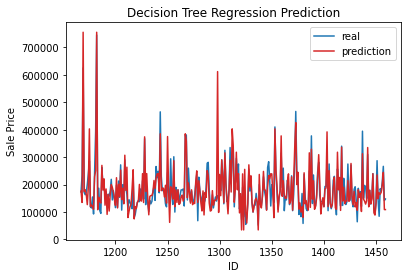

the r2 score is : 0.748317190035994

------------------------  Linear Regression Prediction ---------------------------


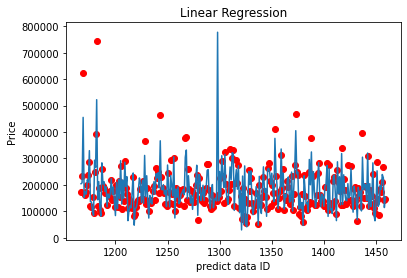

the r2 score is : 0.6411283344087801


----------------------------  XGboost Prediction ---------------------------------


<ipython-input-3-a600a0ee7772>:28: RuntimeWarning: overflow encountered in expm1
  xgb_pred = np.expm1(model_xgb.predict(self.x_test))


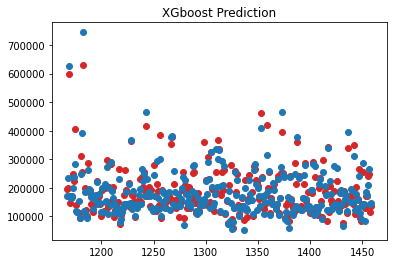

the r2 score is : 0.8374739677268802

-------------------------  Neural Network Prediction -----------------------------
Epoch 1/30
37/37 [==============================] - 1s 8ms/step - loss: 34788204544.0000
Epoch 2/30
37/37 [==============================] - 0s 8ms/step - loss: 4078736384.0000
Epoch 3/30
37/37 [==============================] - 0s 7ms/step - loss: 2492362496.0000
Epoch 4/30
37/37 [==============================] - 0s 9ms/step - loss: 2246780672.0000
Epoch 5/30
37/37 [==============================] - 0s 9ms/step - loss: 2201800192.0000
Epoch 6/30
37/37 [==============================] - 0s 8ms/step - loss: 2046908800.0000
Epoch 7/30
37/37 [==============================] - 0s 11ms/step - loss: 1905247360.0000
Epoch 8/30
37/37 [==============================] - 0s 7ms/step - loss: 1824407808.0000
Epoch 9/30
37/37 [==============================] - 0s 6ms/step - loss: 1813380608.0000
Epoch 10/30
37/37 [==============================] - 0s 6ms/step - loss: 1756133888.0

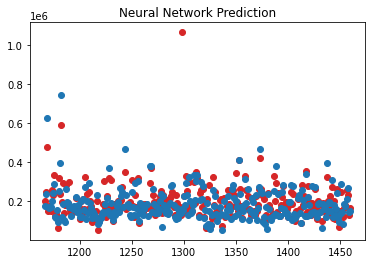

the r2 score is : 0.4088870557664366

--------------------------------  Conculsion -------------------------------------
Regression Tree  r2 score:  0.748317190035994
Linear Regression  r2 score:  0.6411283344087801
XGboost  r2 score:  0.8374739677268802
Neural Network  r2 score:  0.4088870557664366
The best method (where r2 score is the closest to 0.8) is  XGboost


In [5]:
# Imports
# import all desired library for machine learning 
# pandas, pyplot, tree, etc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import OneHotEncoder


class main():
  # data pre processing
  # select data
  data_train = pd.read_csv("train.csv")
  select = ['MSSubClass','LotConfig','OverallQual','GrLivArea','TotalBsmtSF','BsmtFinSF1','2ndFlrSF','GarageArea','1stFlrSF','YearBuilt']

  x_train = data_train[select]
  x_train = pd.get_dummies(x_train, columns = ['LotConfig'])

  y_train = data_train['SalePrice']

  X_train = x_train[0:1167]
  Y_train = y_train[0:1167]
  
  # data for training
  X_test = x_train[1167:1460]
  Y_test = y_train[1167:1460]
  
  # data for testing
  data_test = pd.read_csv('test.csv')
  x_test = data_test[select]
  x_test = x_test.fillna(0)
  x_test = pd.get_dummies(x_test, columns = ['LotConfig'])




  # Regression Tree
  print('------------------------  Regression Tree Prediction ----------------------------')
  reg_tree_predict = regression_tree(X_train,Y_train,X_test,Y_test)
  print()

  # Linear Regression
  print('------------------------  Linear Regression Prediction ---------------------------')
  lin_reg_predict = multivariate_linear_reg(X_train,Y_train,X_test,Y_test)
  print()

  # XGboost
  print('----------------------------  XGboost Prediction ---------------------------------')
  xgboost_predict = XGboost(X_train,Y_train,X_test,Y_test)
  print()

  # Neural Network
  print('-------------------------  Neural Network Prediction -----------------------------')
  neural_net_predict = neuralnetwork(X_train,Y_train,X_test,Y_test)
  print()

  print('--------------------------------  Conculsion -------------------------------------')
  # Comparsion    
  # To find the best method for housr price prediction
  my_dict = {"Regression Tree":reg_tree_predict.score, "Linear Regression":lin_reg_predict.score, "XGboost":xgboost_predict.score, "Neural Network": neural_net_predict.score}
  for key in my_dict:
    print(key," r2 score: ",my_dict[key])
  best_key, best_val = min(my_dict.items(), key=lambda x: abs(0.8 - x[1]))
  print("The best method (where r2 score is the closest to 0.8) is ",best_key)
  
if __name__ == '__main__':
  main()
